<a href="https://colab.research.google.com/github/AnnaBujniewicz/NLP_project/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliometric analysis based on the Scopus platform on the search strings “pandemic” and “data science”. (Network Analysis and natural language processing)


Data: https://raw.githubusercontent.com/ztakac18/M2-data/main/scopus.csv

Colaboratory link:  https://colab.research.google.com/drive/1Lo7sbcehB8HsESZkQe4JCOECKJXFB-Lc?usp=sharing



![](https://drive.google.com/uc?id=1lGuE3SQDmlYQjf2cmOK92lbsbQPWRsoE)

In the following document we will conduct a bibliometric analysis of the Scopus data base on the search term *"data science" AND ("COVID19" OR "pandemic")*. The further reasoning for the choice of the topic, as well as the choice of the search string is provided in the attached stakeholder report.

The following analysis consists of cleaning the data, exploratory analysis, network analysis and natural language processing, particularly count-based statistics and topic modeling.

#Download important libraries and data

In [ ]:
#Installing the necessary packages
!python -m spacy download en_core_web_sm
!pip install metaknowledge
!pip install -qq holoviews
!pip install -qq -U bokeh
!pip install -qq datashader
!pip install -qq pyLDAvis

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 163kB 11.1MB/s 
     |████████████████████████████████| 8.9MB 9.7MB/s 
     |████████████████████████████████| 2.2MB 36.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 15.8MB 214kB/s 
     |████████████████████████████████| 1.6MB 42.2MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 675kB 40.0MB/s 
     |████████████████████████████████| 102kB 11.9MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
ERROR: distributed 2021.2.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.2.0 has requirement dask>=2021.02.0, but you'll have dask 2.12.0 which is incompatible.
     |████████████████████████████████| 1.7MB 11

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
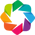

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<Figure size 720x720 with 0 Axes>

In [ ]:
#Importing the needed libraries
#Changing some settings
#Downloading some lists
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy.matcher import PhraseMatcher
import networkx as nx
import community as community_louvain
from collections import Counter
sns.set(rc={'figure.figsize':(15,15)})
plt.figure(figsize=(10,10))
import warnings
warnings.filterwarnings('ignore')
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
from holoviews.operation.datashader import datashade, bundle_graph
from collections import Counter
import itertools
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
from gensim.similarities import MatrixSimilarity
import umap
import metaknowledge as mk

In [ ]:
#Using it as one of the commands we are using for iteration is giving a warning about being discontinued in the future
warnings.filterwarnings('ignore')

In [ ]:
#Load the file
#Read the data in using the scopus functionality (it allows for a more readable split of the columns)
#It creates a list instead of a dataframe; converting it to a dataframe
scopus = mk.scopus.scopusHandlers.scopusParser("scopus.csv")
sc= scopus[0]
RC = mk.RecordCollection(sc)
df = pd.DataFrame(RC.makeDict())

In [ ]:
#Exploring the data 
df.head()

EID  Source  ... num-Female num-Unknown
0  2-s2.0-85091203131  Scopus  ...          0           3
1  2-s2.0-85085209376  Scopus  ...          0           2
2  2-s2.0-85058632421  Scopus  ...          0           1
3  2-s2.0-85088952595  Scopus  ...          0          14
4  2-s2.0-85048670068  Scopus  ...          0           7

[5 rows x 51 columns]

#Inspecting data, cleaning data and some analysis 


##Create a piechart of Document Type


In [ ]:
#Inspecting the "Document Type" 
Counter(df['Document Type'])

Counter({'Article': 473,
         'Book': 10,
         'Book Chapter': 18,
         'Conference Paper': 68,
         'Conference Review': 2,
         'Data Paper': 2,
         'Editorial': 15,
         'Erratum': 1,
         'Letter': 18,
         None: 1,
         'Note': 27,
         'Review': 69,
         'Short Survey': 3})

In [ ]:
#Prepare data for visualization 
document_type = df.groupby('Document Type').agg('count')
document_labels = document_type.Authors.sort_values().index
document_counts = document_type.Authors.sort_values()

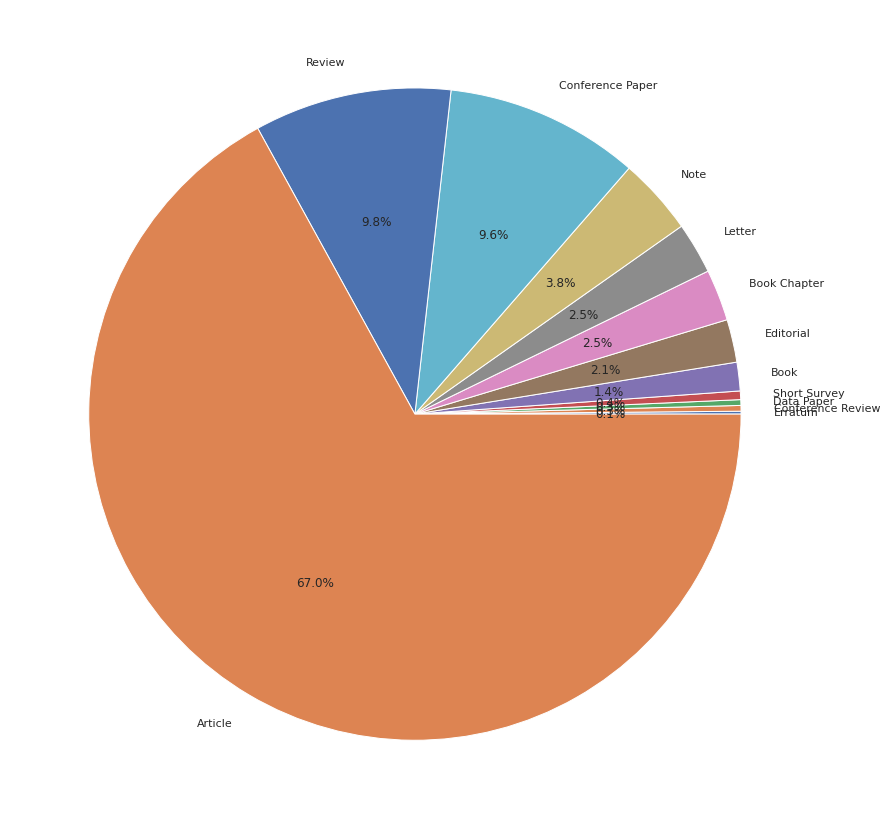

In [ ]:
#Create visualizations
document_show = plt.pie(document_counts, labels = document_labels, autopct='%1.1f%%')

In this visualization we can see that  "Articles" and "Reviews" are the most popular type of documents written our topic area. The number of Articles is 473 and Reviews 69. Additionally, Articles and Reviews are the most commonly used forms.
Therefore we decided to keep only this type of documents in the further analysis.

##Keeping only the articles and reviews 


In [ ]:
#Keeping only Articles and Reviews
#Making a list containing the two selected types
documents = ["Article", "Review"]
#Only keeping  the cells that have the document type contained in the list
df = df[df["Document Type"].isin(documents)]

##Merge index keywords and authors keywords 

In the dataframe two very similar columns can be found: author keywords and index keywords. Upon an inspection we discovered that oftentimes only one of the columns is filled. Additionally, in many cases when both the columns were filled the keywords were identical in both of them. Therefore, we decided it would be beneficial for the analysis to gather all the data within one column.

First we want to check how many missing values are in both "Authot Keywords" and "Index Keywords" in order to decide which column will be the main one. 
As we can see the "Author Keywords" column has less missing values, therefore filling the values from the "Index Keywords" to "Authors Keywords" is done. 

In [ ]:
#See missing in Author Keywords
df['Author Keywords'].isnull().sum()

134

In [ ]:
#See missing in Index Keywords
df['Index Keywords'].isnull().sum()

196

In [ ]:
#Fill in the missing places 
df["Author Keywords"].fillna(df["Index Keywords"], inplace = True)

##Replace missing values and drop unnecessary columns

In [ ]:
#Detect missing values
#Some columns have many missing values - luckily, many of them are not useful for this analysis
df.isna().sum()

EID                                0
Source                             0
Publication Stage                542
Document Type                      0
Abbreviated Source Title           0
Language of Original Document      0
PubMed ID                        300
CODEN                            372
ISSN                               0
Publisher                          9
Correspondence Address            81
References                        24
Abstract                           0
Authors with affiliations          0
Affiliations                       3
Link                               0
DOI                               15
Page end                           0
Page start                         0
Source title                       0
Year                               0
Title                              0
Author(s) ID                     542
Authors                            0
Access Type                      542
Index Keywords                   196
Author Keywords                   26
C

In [ ]:
#The columns which are not needed for further analysis are deleted.
df = df.drop(["Publication Stage","Document Type","Index Keywords","num-Male","num-Female","num-Unknown" ,"Author(s) ID","Volume","Issue","Art. No.", "Page start","Page end","Page count","Link","Authors with affiliations","Molecular Sequence Numbers","Chemicals/CAS","Tradenames","Manufacturers","Funding Details","Funding Text 1","Funding Text 2","Funding Text 3","Editors","Sponsors","Conference name","Conference date","Conference location","Conference code","ISSN","ISBN","CODEN","PubMed ID","Abbreviated Source Title","Access Type","Source","EID","DOI","Source title","Correspondence Address"], axis=1)

In [ ]:
#Checking the number of missing values again
#Other than Cited by the numbers are rather low
df.isna().sum()

Language of Original Document      0
Publisher                          9
References                        24
Abstract                           0
Affiliations                       3
Year                               0
Title                              0
Authors                            0
Author Keywords                   26
Cited by                         248
num-Authors                        0
dtype: int64

In [ ]:
#The missing value in citation may not be a mistake but the information that the
#document has not been cited yet, therefore it is not a good idea to drop it
#We filled the missing places with 0 since 0 people cited those articles
df["Cited by"].fillna(0, inplace = True)

In [ ]:
#Dropping the missing values
df.dropna(inplace = True)

In [ ]:
#Checking for missing values
#There is none!
df.isna().sum()

Language of Original Document    0
Publisher                        0
References                       0
Abstract                         0
Affiliations                     0
Year                             0
Title                            0
Authors                          0
Author Keywords                  0
Cited by                         0
num-Authors                      0
dtype: int64

The unnecessary columns for our further analysis were dropped. 

After checking the missing values we can see that there are a lot of them in "Cited by" column, therefore the values are changed to be 0 as we assumed that some of the newest papers might not be cited yet. 
The number of the missing values in other columns is not so significant therefore this entries are removed. Additionally, imputing the values would not be possible, as they are not numeric. As we can see even if we merge the "Author Keywords" and "Index Keywords" there are still 26 documents without any keywords.

##Filter the "Abstract" column 

In [ ]:
#Show entries with "No abstract available"
#There appears to be missing values within the abstract column
df[df['Abstract'] == '[No abstract available]']

Language of Original Document  ... num-Authors
17                      [English]  ...          34
75                      [English]  ...           1
167                     [English]  ...           1
228                     [English]  ...           1
344                     [English]  ...           3
351                     [English]  ...           8
428                     [English]  ...           6
601                     [English]  ...           1
603                     [English]  ...           5
667                     [English]  ...           6
668                     [English]  ...           2

[11 rows x 11 columns]

In [ ]:
#Drop the rows with "No abstract avaliable"
df = df[df['Abstract'] != '[No abstract available]']

##Extract the country 

We decided that inspecting where the research was conducted would be beneficial for the analysis. Therefore in this part the country column will be extracted and added to the dataframe.

In [ ]:
#Inspect the column containing the country names for the universities where the researchers worked
df['Affiliations']

1      University of Pretoria, South Africa; Industri...
2      Universität Bielefeld Fakultät für Soziologie,...
3      Emerging Markets Research Centre (EMaRC), Scho...
4      Department of Experimental Medicine, Post Grad...
5      Centre for Infectious Disease Control, Nationa...
                             ...                        
701    Mohammadia School of Engineers (EMI), Mohammed...
702    Viral Diseases Branch, Walter Reed Army Instit...
703    Concierge Lifestyle Medicine, Fort Myers, FL, ...
704    Leidos Inc, Atlanta, GA, United States; Immuni...
706    Department of Communication, University of Ari...
Name: Affiliations, Length: 473, dtype: object

In [ ]:
#Finding all the countries within the Affiliation column
#Loading the Spacy model for English
nlp = spacy.load('en_core_web_sm')
#Creating a matcher instance
matcher = PhraseMatcher(nlp.vocab)
#Creating a new dataframe column containing all the geographic locations from the Affiliation column
df["country"] = df["Affiliations"].map(lambda x: [ent.text for ent in list(nlp(str(x)).ents) if ent.label_ == 'GPE'])

As Spacy extracts all the geographic entities, the lists also contain some city names. For this reason Counter will be used to find the instances reocurring more often. Since there is a lot more researchers within a given country, than within the given city, finding the list of the most reocurring names returns a list of countries.

In [ ]:
#Using counter on the country column to find the most reocurring locations
Counter(itertools.chain(*df["country"])).most_common(8)

[('United States', 621),
 ('United Kingdom', 232),
 ('Germany', 159),
 ('Italy', 114),
 ('Australia', 107),
 ('China', 82),
 ('France', 81),
 ('India', 80)]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

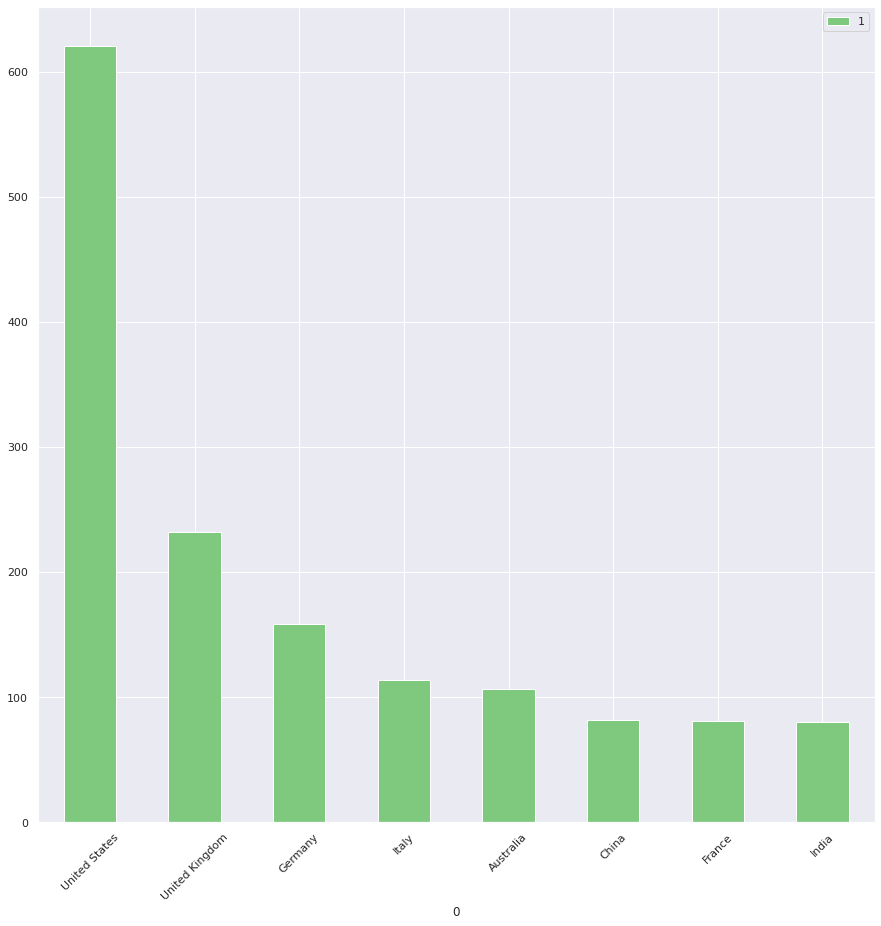

In [ ]:
#Creating a dataframe from the counter data for the visualisation
common_countries = pd.DataFrame(Counter(itertools.chain(*df["country"])).most_common(8)).set_index(0)
#Changing the color
common_countries.plot.bar(colormap = "Accent")
#Changing the label rotation`
plt.xticks(rotation=45)

As can be seen from the initial exploration conducted on the newly created column, the vast majority of the research seems to be created in the United States. The next country is the United Kingdom.

This is not a surprising discovery, as US is a country with a very high population. Additionally, the search term was constructed in English. This provides another reason for the two countries with the most research within this dataframe to be English speaking

##Finishing touch

In order to make the dataframe neat, now that the unnescessary parts of the dataset were removed, the index is reset.

Additionally, for the ease of working with the data, the column titles are set to lower case letters and multi words column titles are changed to be one word only.

In [ ]:
#Lower capital letters  and reset index
df.reset_index(inplace=True, drop = True)
df.columns = [x.lower() for x in df.columns]

In [ ]:
#Rename the columns
df.rename(columns={"author keywords":"keywords","language of original document":"language","cited by":"cited"}, inplace=True)

In [ ]:
#Inspecting the cleaned up dataframe with .info()
#473 entries, majority of them non-numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   language      473 non-null    object 
 1   publisher     473 non-null    object 
 2   references    473 non-null    object 
 3   abstract      473 non-null    object 
 4   affiliations  473 non-null    object 
 5   year          473 non-null    float64
 6   title         473 non-null    object 
 7   authors       473 non-null    object 
 8   keywords      473 non-null    object 
 9   cited         473 non-null    float64
 10  num-authors   473 non-null    int64  
 11  country       473 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 44.5+ KB


In [ ]:
#Inspecting the cleaned up dataframe with .head()
#Everything appears to be good
df.head()

language  ...                                            country
0  [English]  ...         [South Africa, South Africa, South Africa]
1   [German]  ...                               [Bielefeld, Germany]
2  [English]  ...  [Bay Campus, Swansea, United Kingdom, United K...
3  [English]  ...  [Hygiene, Perugia, Italy, DISSAL, Genoa, Italy...
4  [English]  ...                 [Netherlands, Leiden, Netherlands]

[5 rows x 12 columns]

#Statistical analysis/Introduction to the dataset 

##Chart for the publisher



In [ ]:
#Count number of values in column
publisher = df.publisher.value_counts()
#Display the top 10 publishers
#Some names we all definitely know
publisher.head(10)

Elsevier Ltd                                              37
MDPI AG                                                   35
Public Library of Science                                 30
Springer                                                  27
Elsevier B.V.                                             21
SpringerOpen                                              12
Blackwell Publishing Ltd                                  11
BioMed Central Ltd.                                       11
Taylor and Francis Ltd.                                   10
Institute of Electrical and Electronics Engineers Inc.    10
Name: publisher, dtype: int64

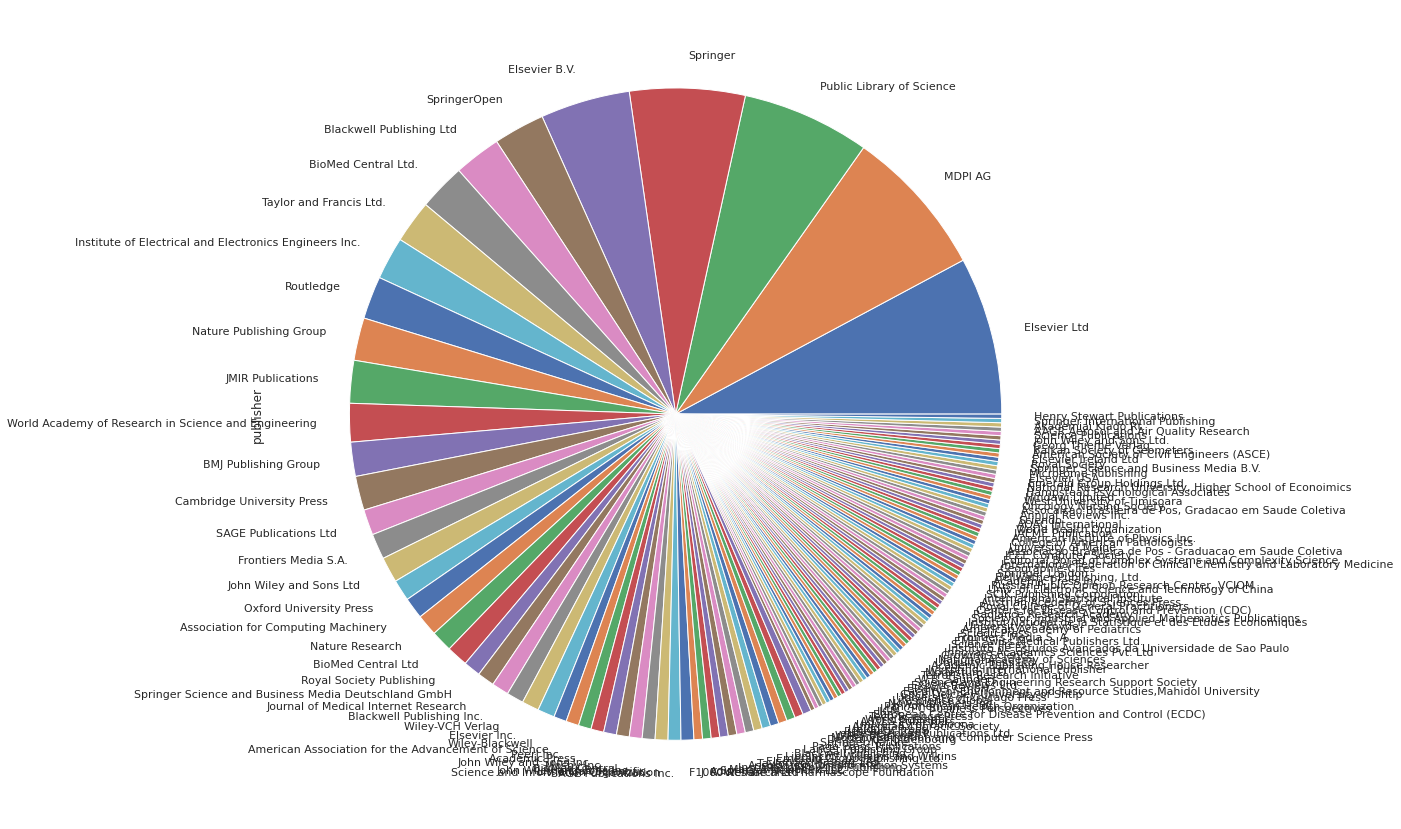

In [ ]:
#Visualization for all the publishers
#The graph is messy so we take a closer look at the most popular 10
df["publisher"].value_counts().plot.pie(figsize=(15, 15))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

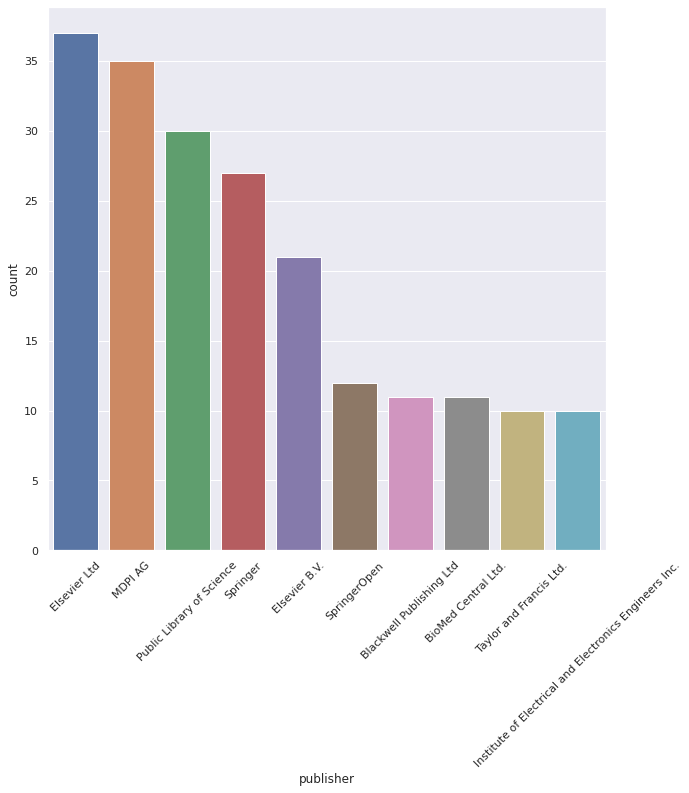

In [ ]:
#Visualizing the top 10 most popular publishers
#It seems that the first 5 are a good bit more popular than the following
sns.set(rc={'figure.figsize':(10, 10)})
sns.countplot(df.publisher, order=df.publisher.value_counts().iloc[:10].index)
plt.xticks(rotation=45)

As we can see there is a lot of Publisher of the articles in dataframe. The most popular is 'Elsevier Ltd' with 36 documents and 'MDPI AG' with 35. The other popular publishers are 'Springer', 'Public Library of Science' and 'Elsevier B.V.'

##Piechart for the language 



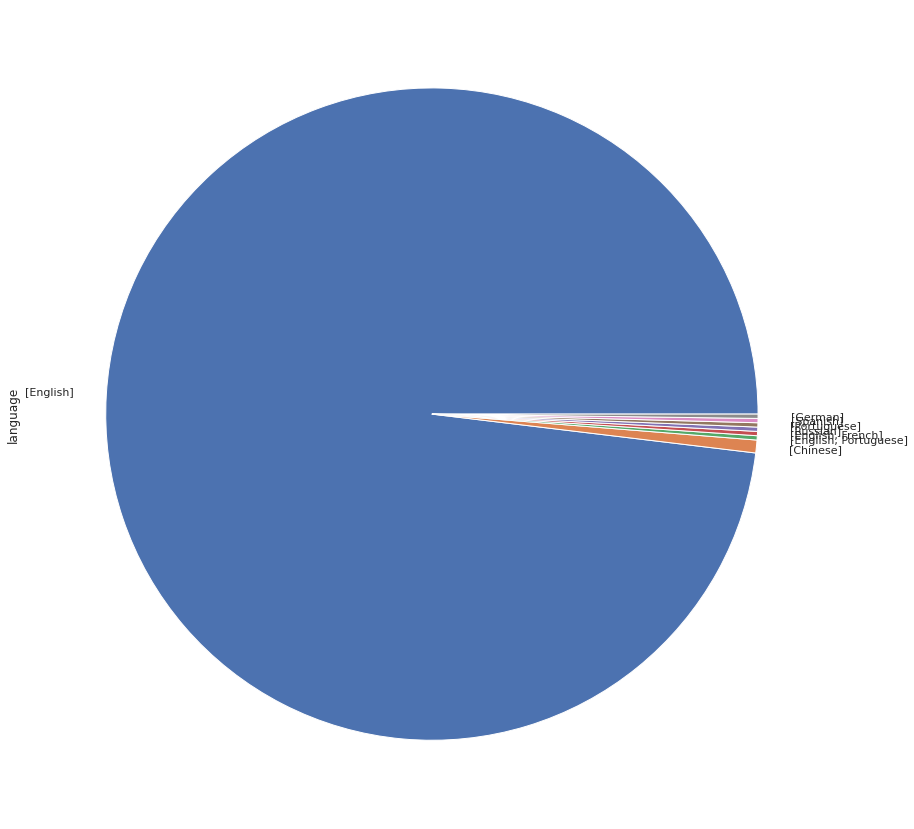

In [ ]:
#Visualization of the 'Language" distribution  
#The vast majority was written in English
df["language"].value_counts().plot.pie(figsize=(15, 15))

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

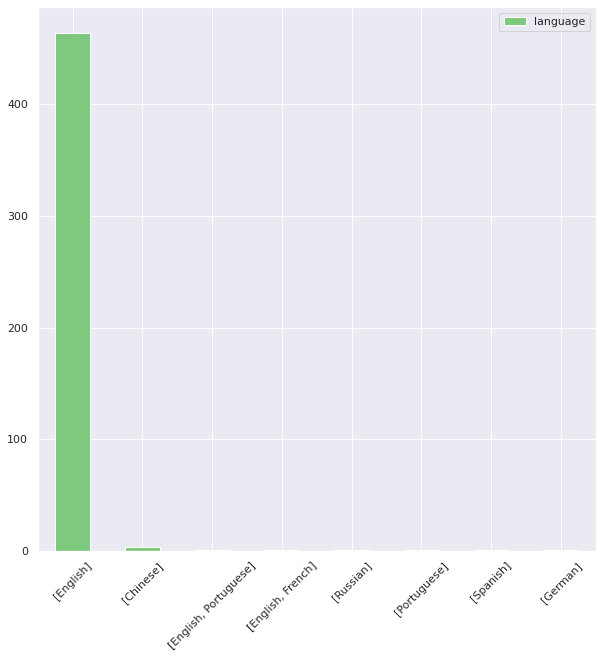

In [ ]:
#Inspecting the same distribution using the bar plot
#This presents the crushing majority that the English language has even further
language = pd.DataFrame(df["language"].value_counts())
language.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

In [ ]:
#Inspecting the distribution of the languages as numeric values
#Majority of the languages only have one publication
#Chinese is the exception with three articles
pd.DataFrame(df["language"].value_counts())

language
[English]                   464
[Chinese]                     3
[English, Portuguese]         1
[English, French]             1
[Russian]                     1
[Portuguese]                  1
[Spanish]                     1
[German]                      1

In [ ]:
#Leaving only the articles which are included in the English language
#Keeping articles in different languages would make the further NLP a lot more difficult
df["is_eng"] = df["language"].map(lambda x:"English" in x)
df = df[df["is_eng"] == True]

##Chart for Years 

In [ ]:
#Checking number of values in column
#2020 seems to have vastly more publications
year = df.year.value_counts()
year

2020.0    315
2018.0     38
2019.0     33
2016.0     27
2017.0     26
2015.0     12
2014.0      8
2021.0      5
2011.0      1
2008.0      1
Name: year, dtype: int64

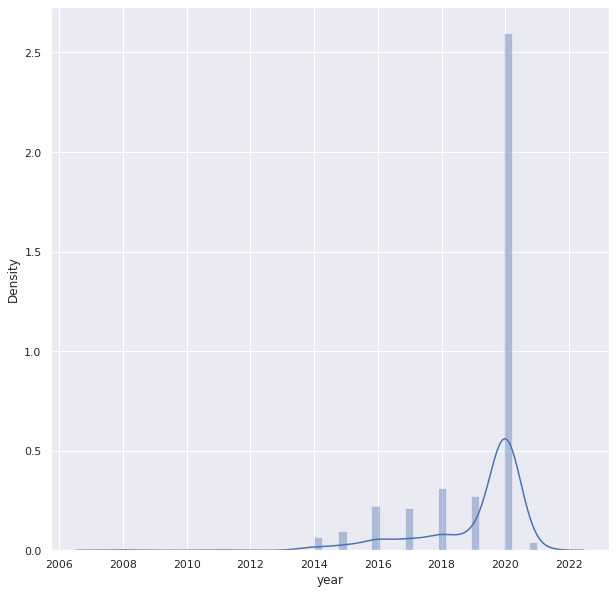

In [ ]:
#Visualization of the years distribution 
sns.distplot(df.year)

The most articles were written in the year 2020, which was expected taking into consideration the currently ongoing pandemic.

##Barplot combination with the year and place



In [ ]:
#Check the years how many articles we have
#Seems to increase from 2015
df["year"].value_counts()

2020.0    315
2018.0     38
2019.0     33
2016.0     27
2017.0     26
2015.0     12
2014.0      8
2021.0      5
2011.0      1
2008.0      1
Name: year, dtype: int64

In [ ]:
#As can be recalled from the previous part, the number of publications seemed to increase from 2015
#Creating an empty dictionary containing dataframes
dict_of_df = {}
#Iterating over the years 2015-2020
for i in range(2015,2021):
#Creating a dataframe with the 7 most common countries for every year
    dict_of_df["df_{}".format(i)] = pd.DataFrame(data = (Counter(itertools.chain(*df[df["year"]==i]["country"])).most_common(7))).set_index(0).rename(columns={1:i})


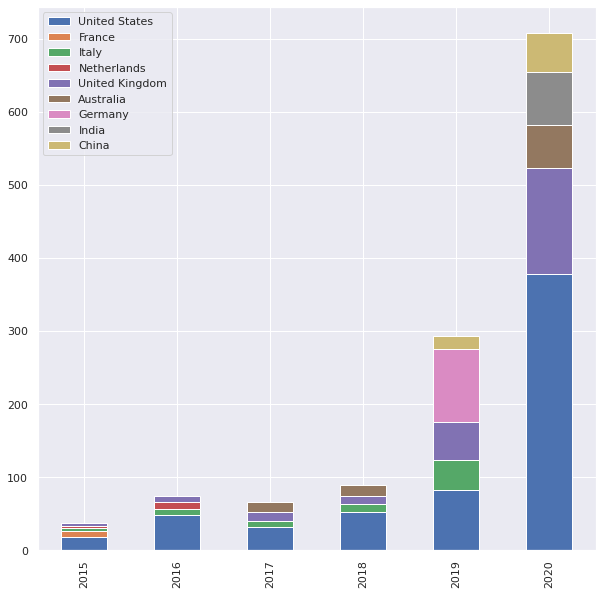

In [ ]:
#Creating a new dataframe through concatinating the previously created dataframes based on the index and transposing it
plotdata = pd.concat([dict_of_df["df_2015"], dict_of_df["df_2016"], dict_of_df["df_2017"], dict_of_df["df_2018"], dict_of_df["df_2019"], dict_of_df["df_2020"]], axis=1).T
#Making a stacked bar chart for the countries of interest
plotdata[["United States", "France", "Italy", "Netherlands", "United Kingdom", "Australia", "Germany", "India", "China"]].plot(kind="bar", stacked=True)

It appears that the number of newly created research skyrocketed particularly in the US and UK.

##Exploring the number of citations

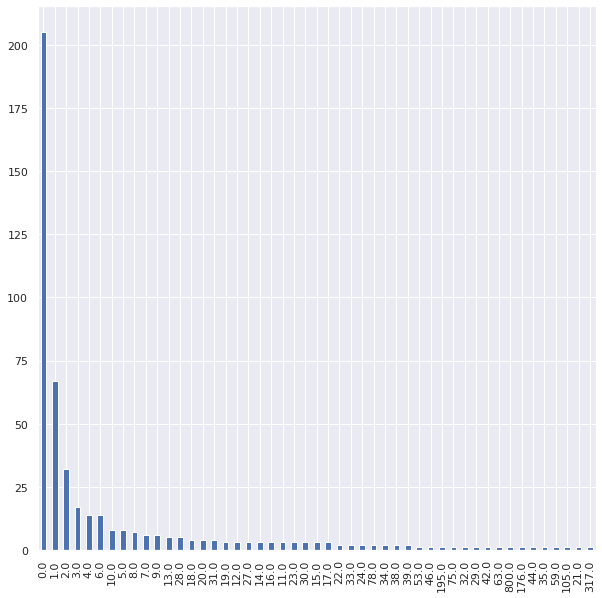

In [ ]:
#Visualization of the number of citations that the articles get
#The vast majority has 0 citations
df["cited"].value_counts().plot.bar()

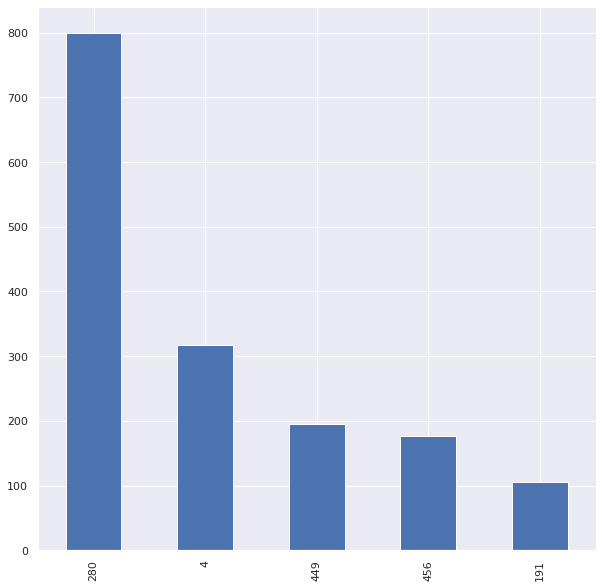

In [ ]:
#Finding the most cited articles
#Number 250 has a lot of citations
df["cited"].sort_values(ascending = False).head(5).plot.bar()

In [ ]:
#Taking a closer look at the paper
df.loc[df["cited"].sort_values(ascending = False).head(1).index]

language                publisher  ...                 country is_eng
280  [English]  Lancet Publishing Group  ...  [Hong Kong, Hong Kong]   True

[1 rows x 13 columns]

As we can see the papers are not cited a lot. Most of the articles were not cited yet or the number of citation is less then 10. However, comparing it with the Years column we can see that the most of the articles are quite new, therefore this distribution of the numbers are understandable.

Nevertheless, we can see as well 5 most cited articles whose number of citations are very high. Four of them have more then 150 citaions.

The most cited document have 800 citations. We decided to check and inspect this document. 

##Exploring the authors


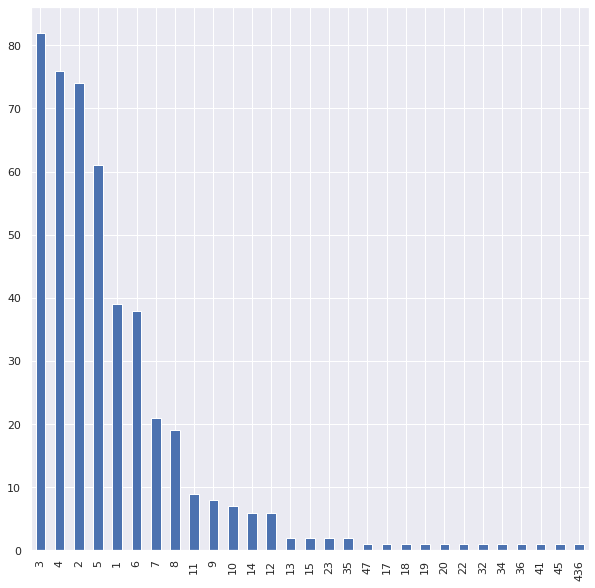

In [ ]:
#Number of authors working together on a given paper
df["num-authors"].value_counts().plot.bar()

In [ ]:
#Using counter to find the 10 authors who wrote the most papers
Counter(itertools.chain(*df["authors"])).most_common(10)

[('Cattuto C.', 6),
 ('Yigitcanlar T.', 6),
 ('Barrat A.', 5),
 ('He D.', 5),
 ('Zhao S.', 5),
 ('Panisson A.', 4),
 ('Li J.', 4),
 ('Lin Q.', 4),
 ('Dwivedi Y.K.', 3),
 ('Bragazzi N.L.', 3)]

As can be seen, the majority of papers is written by three authors. Additionally, the vast majority of the papers is authored by two, three or four people with other number of authors being significantly less likely. The paper written by the highest number of people has 436 authors.

The two authors publishing the highest number of the papers have written 6 articles each, with the three next authors writing 5 articles each.

##Find the most common key words



In [ ]:
#Using counter to find the most common keywords
Counter(itertools.chain(*df["keywords"])).most_common(10)

[('COVID-19', 113),
 ('human', 73),
 ('Humans', 58),
 ('Betacoronavirus', 40),
 ('Article', 39),
 ('pandemic', 28),
 ('Coronavirus', 26),
 ('epidemic', 25),
 ('Coronavirus infection', 23),
 ('Machine learning', 22)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

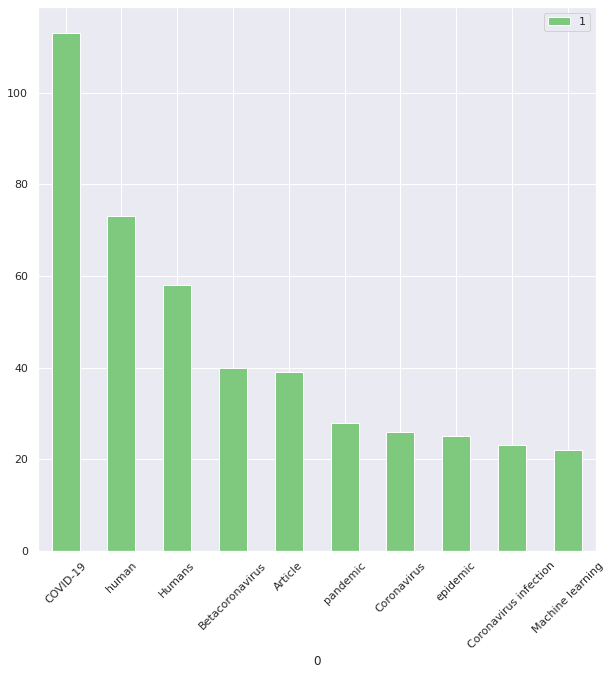

In [ ]:
#Visualizing the most common words as a bar plot
common_words = pd.DataFrame(Counter(itertools.chain(*df["keywords"])).most_common(10)).set_index(0)
common_words.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

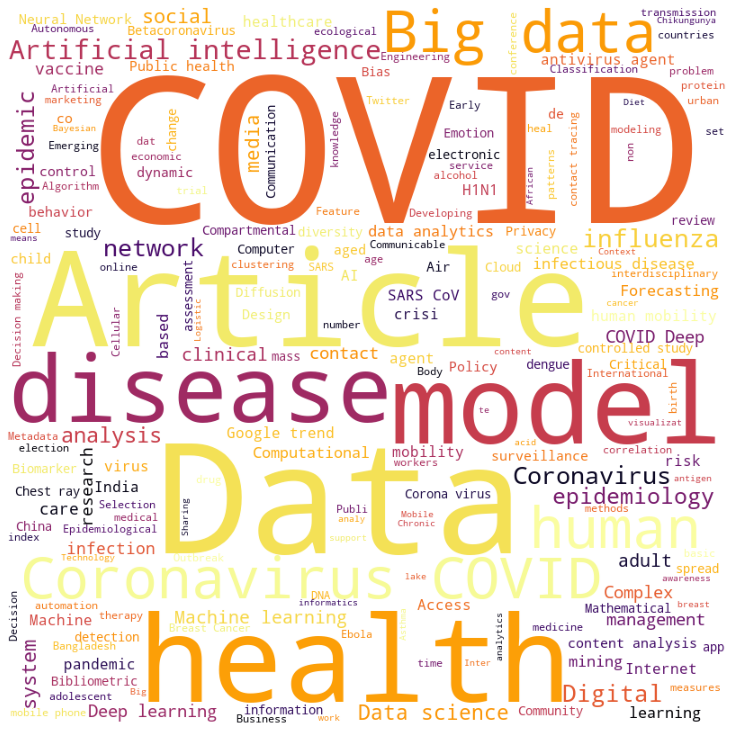

In [ ]:
#Visualizing the keyword column as a word map
text = df["keywords"].to_string()

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, colormap = "inferno").generate(text)

plt.figure(facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

The most common words are the words connected with the "COVID-19", "Human" and "Pandemic". 

#Network analysis


## Coauthor network

In [ ]:
#Creating a network object using the metaknowledge functionality
coauth_net = RC.networkCoAuthor()
#Printing the statistics for the network
print(mk.graphStats(coauth_net))

Nodes: 3670
Edges: 111388
Isolates: 72
Self loops: 15
Density: 0.0165445
Transitivity: 0.998993


The isolates should not be worrying, as it is not impossible for an author to write a paper on their own and never co-author a paper with someone within this limited search scope.

The self loops are more concerning, as it is impossible for an author to write a paper with themselves, there are only two possible explenations. Either some mistake occured (during the creation of the database or parsing of the text), or authors share the initials and the last name. In order to avoid any confusion the self loops will be dropped.

Density is calculated as the number of existing edges divided by the number of all the possible edges. In the case of this network the density is not very high.

Transitivity tells us about how many "closed triples" are there in a graph. In fully transitive graphs, if nodes A and B are connected and nodes B and C are connected, it means that nodes A and C must be connected as well. 

For the case of this network transitivity is very high. This is quite telling especially in connection with low density: it can be expected that there are few very interconnected groups of authors who rarely interact with each other.

In [ ]:
#Removing self loops
mk.dropEdges(coauth_net, dropSelfLoops = True)

In [ ]:
#Finding the degree centrality
pd.DataFrame(nx.degree_centrality(coauth_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
Liu Y.         0.133279
Zhang H.       0.120196
Hundemer M.    0.118561
Korn T.        0.118561
Kukat C.       0.118561
Kühne J.       0.118561
Krueger A.     0.118561
Kroneis T.     0.118561
Kristyanto H.  0.118561
Kriegsmann K.  0.118561

In [ ]:
#Finding the eigenvector centrality
pd.DataFrame(nx.eigenvector_centrality_numpy(coauth_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
Liu Y.         0.047906
Zhang H.       0.047893
Frenette P.S.  0.047891
Hämmerling G.  0.047891
Hwang W.Y.K.   0.047891
Huehn J.       0.047891
Simon A.K.     0.047891
Huang B.       0.047891
Schulte R.     0.047891
Esser C.       0.047891

In [ ]:
#Finding the betweenness centrality
pd.DataFrame(nx.betweenness_centrality(coauth_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
Liu Y.         0.038515
Vespignani A.  0.017662
King G.        0.013224
Reich N.G.     0.009849
Zhang Y.       0.009353
Chen J.        0.009160
Jefferson E.   0.009090
Viboud C.      0.008316
Zhang H.       0.008174
Tizzoni M.     0.007828

The degree centrality measures how many edges are attached to each node. The eigenvector centrality bases the calculations on the centrality of the neighbouring nodes, that is also measured in a recursive way (so node A centrality could be based on B and C centrality, and then node B centrality is based on node D and E centrality and so on). In betweenness centrality tries to finds the node with the shortest paths to other nodes to be the most central, so it won't nescesserily be high for the nodes with otherwise high centralities.

It is interesting to see that for this network the top centrality of all three kinds belongs to one author. it suggests his high importance within the research community focused around this particular topic.

In [ ]:
#Creating the dictionary of the node centrality
node_degree_dict=nx.degree(coauth_net)
#Only choosing objects with higher degree centrality (rendering everything would be very computationally expensive)
selected_network=nx.subgraph(coauth_net,[x for x in coauth_net.nodes() if node_degree_dict[x]>30])
#Creating a community partition
partition = community_louvain.best_partition(selected_network)

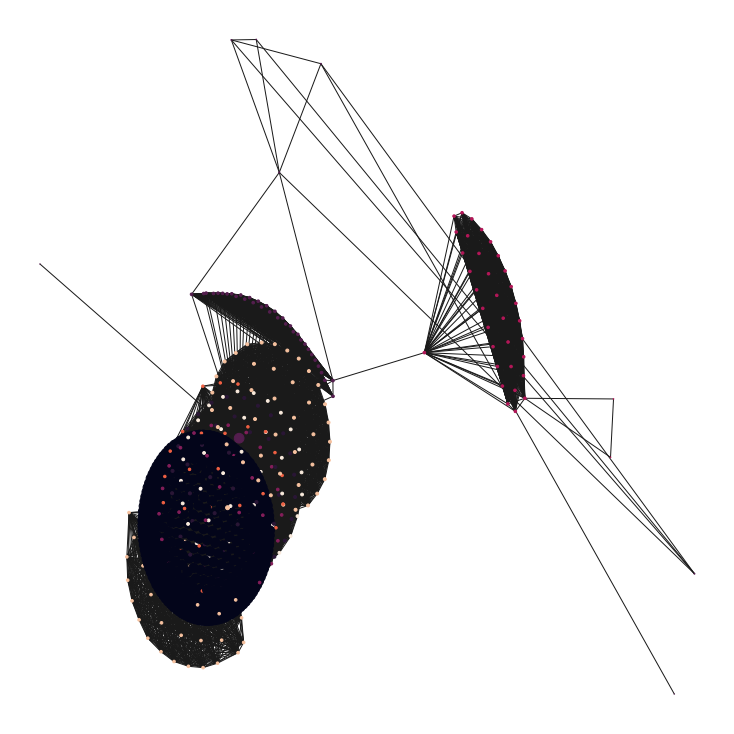

In [ ]:
#Visualizing the network
nx.draw_kamada_kawai(selected_network, node_color=list(partition.values()), node_size=[v * 0.2 for v in dict(selected_network.degree()).values()])

As expected based on transitivity and density, the network seems to consist of few extremely interconnected clusters with only few connections between them. Additionally, it appears that the community detection did reasonably well while detecting communities. It can be seen that in many cases the visible clusters share the same node color.

## Citation network

In [ ]:
#Creating the network using the metaknowledge functionality
cit_net = RC.networkCitation()
#Printing the statistics for the network
print(mk.graphStats(cit_net))

Nodes: 44618
Edges: 46130
Isolates: 0
Self loops: 0
Density: 2.31725E-05
Transitivity: 0


In [ ]:
#Checking the reciprocity as well, as this network is direected
nx.reciprocity(cit_net)

0.0

This network is considerably larger than the previous one. In this case there are no self loops or isolates, which is a good sign, as isolates should not occur in citation network - a paper that was not cited would not appear in the database as a citation.

The density is very low which is reasonable considering the nearly infinitely large set of papers that can be chosen for a citation and the fact, that majority of authors won't choose to use the same papers.

Transitivity is equal to zero. This also shouldn't raise concerns for the aforementioned reason that it is unlikely for two authors to cite the same papers, especially in a new and developing topic, such as data science and the pandemic.

Additionally, as this is a directed network reciprocity was calculated. It is also equal to zero. That was the expected outcome, as it is extremely unlikely for authors to cite each other, especially within such a short period of time.

In [ ]:
#Checking the degree centrality
pd.DataFrame(nx.degree_centrality(cit_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
COSSARIZZA A., 2019, EUROPEAN JOURNAL OF IMMUNO...  0.050429
TEUTSCH S.M., 2018, GETTING TO ZERO ALCOHOL-IMP...  0.034269
KELLMAN B., 2007, BIOVIOLENCE: PREVENTING BIOLO...  0.029787
IACOBUCCI D., 2019, FOUNDATIONS AND TRENDS IN M...  0.026739
SHIBUYA K., 2020, DIGITAL TRANSFORMATION OF IDE...  0.015039
DEL RÍO CASTRO G., 2021, JOURNAL OF CLEANER PRO...  0.013112
AL MAZARI A., 2018, BIG DATA ANALYTICS IN HIV/A...  0.011139
JANEV V., 2020, LECTURE NOTES IN COMPUTER SCIEN...  0.010915
HOLMBERG K., 2015, ALTMETRICS FOR INFORMATION P...  0.009301
CERON A., 2016, POLITICS AND BIG DATA: NOWCASTI...  0.009279

In [ ]:
#Checking the eigenvector centrality
pd.DataFrame(nx.eigenvector_centrality_numpy(cit_net), index = [0]).T.sort_values(by=0, ascending = False).head(10)

0
MCIVER, D.J., 2014, PLOS COMPUT BIOL                0.024148
ALTHOUSE, B.M., 2015, EPJ DATA SCI                  0.021944
FERGUSON, N.M., 2006, NATURE                        0.021505
CHEW, C., 2010, PLOS ONE                            0.020900
NUTI, S.V., 2014, PLOS ONE                          0.020363
KUCHARSKI, A.J., 2020, LANCET INFECT. DIS.          0.019724
OLSON, D.R., 2013, PLOS COMPUT BIOL                 0.019181
SIGNORINI, A., 2011, PLOS ONE                       0.018859
JONES, K.E., 2008, NATURE                           0.018023
MIKOLOV, T., 2013, ADVANCES IN NEURAL INFORMATI...  0.017968

Here the betweenness centrality was not calculated, as due to the size of the network it was very computationally expensive.

It is interesting to see, that the degree centrality is typically high for the new papers (citers), whereas the eigenvector centrality tends to be higher for the old papers (citees).

In [ ]:
#Creating the dictionary of the node centrality
node_degree_dict_1=nx.degree(cit_net)
#Only choosing the nodes with higher centrality
selected_network_1=nx.subgraph(cit_net,[x for x in cit_net.nodes() if node_degree_dict_1[x]>9])

In [ ]:
# setting up a layout
layout = nx.layout.kamada_kawai_layout(selected_network_1)
# creating a plot
plot = hv.Graph.from_networkx(selected_network_1, layout)
bundled = bundle_graph(plot)
# additional settings
bundled.opts(
    opts.Graph(edge_color='weight', cmap='magma',
                 node_color = "red", node_size = 10))
# showing the plot
show(hv.render(bundled))
#This method of visualization was not used for the previous network, as only choosing the more central nodes didn't provide a proper visualization
#And rendering this visualization for all the observations was taking close to an hour

Upon inspection it appears that the older articles, the ones that were cited are mostly clustered in the middle. The new articles - the citers - are mostly located on the edges.

It should be noted here, that as the articles with the lowest centrality were filtered out to make the rendering of the graph possible, there are some isolates visible on the graph. it is caused by the points they should be connected to being filtered out.

#Analysis of the abstract/topic modeling




##Data preparation for NLP

In [ ]:
#Creating a new, smaller dataframe using only the needed columns
df1 = df.loc[:,["abstract", "year"]]
#Resetting the index
df1.reset_index(inplace = True, drop = True)
#Exploring the dataframe
df1.head()

abstract    year
0  The coronavirus disease (COVID-19), caused by ...  2020.0
1  The COVID-19 pandemic has forced many organisa...  2020.0
2  Aim: According to the World Health Organizatio...  2018.0
3  A novel coronavirus (2019-nCoV) is causing an ...  2020.0
4  The pandemic corona virus so called COVID-19 o...  2020.0

In [ ]:
#Adding a new column for the tokenized abstract
#So far placing the abstract with lowered capital leters in the column
df1["tokenized"] = df1["abstract"].map(lambda x: x.lower())
df1.head()

abstract  ...                                          tokenized
0  The coronavirus disease (COVID-19), caused by ...  ...  the coronavirus disease (covid-19), caused by ...
1  The COVID-19 pandemic has forced many organisa...  ...  the covid-19 pandemic has forced many organisa...
2  Aim: According to the World Health Organizatio...  ...  aim: according to the world health organizatio...
3  A novel coronavirus (2019-nCoV) is causing an ...  ...  a novel coronavirus (2019-ncov) is causing an ...
4  The pandemic corona virus so called COVID-19 o...  ...  the pandemic corona virus so called covid-19 o...

[5 rows x 3 columns]

In [ ]:
#Tokenizing the abstract
df1["tokenized"] = df1["tokenized"].map(lambda x: word_tokenize(x))
df1.head()

abstract  ...                                          tokenized
0  The coronavirus disease (COVID-19), caused by ...  ...  [the, coronavirus, disease, (, covid-19, ), ,,...
1  The COVID-19 pandemic has forced many organisa...  ...  [the, covid-19, pandemic, has, forced, many, o...
2  Aim: According to the World Health Organizatio...  ...  [aim, :, according, to, the, world, health, or...
3  A novel coronavirus (2019-nCoV) is causing an ...  ...  [a, novel, coronavirus, (, 2019-ncov, ), is, c...
4  The pandemic corona virus so called COVID-19 o...  ...  [the, pandemic, corona, virus, so, called, cov...

[5 rows x 3 columns]

In [ ]:
#Creating a stoplist containing a list of english stopwords from nltk, a list of punctuation and the copyright sign
c = '©'
stoplist = set(stopwords.words('english') + list(punctuation) + list(c))
#Only keeping the words that are not in the stoplist
df1["tokenized"] = df1["tokenized"].map(lambda x: [word for word in x if word not in stoplist])
df1.head()

abstract  ...                                          tokenized
0  The coronavirus disease (COVID-19), caused by ...  ...  [coronavirus, disease, covid-19, caused, sars-...
1  The COVID-19 pandemic has forced many organisa...  ...  [covid-19, pandemic, forced, many, organisatio...
2  Aim: According to the World Health Organizatio...  ...  [aim, according, world, health, organization, ...
3  A novel coronavirus (2019-nCoV) is causing an ...  ...  [novel, coronavirus, 2019-ncov, causing, outbr...
4  The pandemic corona virus so called COVID-19 o...  ...  [pandemic, corona, virus, called, covid-19, ou...

[5 rows x 3 columns]

In [ ]:
#Creating a lemmatizer instance
lemmatizer = WordNetLemmatizer()
#Applying the lemmatizer
df1["tokenized"] = df1["tokenized"].map(lambda x: [lemmatizer.lemmatize(word) for word in x])
df1.head()

abstract  ...                                          tokenized
0  The coronavirus disease (COVID-19), caused by ...  ...  [coronavirus, disease, covid-19, caused, sars-...
1  The COVID-19 pandemic has forced many organisa...  ...  [covid-19, pandemic, forced, many, organisatio...
2  Aim: According to the World Health Organizatio...  ...  [aim, according, world, health, organization, ...
3  A novel coronavirus (2019-nCoV) is causing an ...  ...  [novel, coronavirus, 2019-ncov, causing, outbr...
4  The pandemic corona virus so called COVID-19 o...  ...  [pandemic, corona, virus, called, covid-19, ou...

[5 rows x 3 columns]

At this point a choice between lemmatization, stemming or both needed to be made. To make this choice it is important to know the mechanism behind both of those options. In the case of lemmatizing, the words get replaced with their base word based on the meaning, whereas in the case of stemming, certain endings simply get chopped off. Using stemming or both often leads to cleaner looking bag of words, however it can also lead to a loss of predictive power of a model.


##Count based methods

In [ ]:
#Creating the trigrams
df1["ngram"] = df1["tokenized"].map(lambda x: [ ' '.join(gram) for gram in ngrams(x,3)] )
#Finding the most common tri grams -they are not interesting, scientific stuff
Counter(itertools.chain(*df1["ngram"])).most_common(10)

[('article distributed term', 23),
 ('distributed term creative', 23),
 ('term creative common', 23),
 ('creative common attribution', 23),
 ('common attribution license', 23),
 ('medium provided original', 23),
 ('social medium data', 22),
 ('unrestricted use distribution', 22),
 ('use distribution reproduction', 22),
 ('distribution reproduction medium', 22)]

In [ ]:
#Digrams are a bit more interesting
df1["ngram"] = df1["tokenized"].map(lambda x: [ ' '.join(gram) for gram in ngrams(x,2)] )
Counter(itertools.chain(*df1["ngram"])).most_common(10)

[('social medium', 139),
 ('public health', 128),
 ('big data', 92),
 ('2020 author', 89),
 ('95 ci', 76),
 ('covid-19 pandemic', 68),
 ('infectious disease', 58),
 ('right reserved', 54),
 ("'' ''", 50),
 ('machine learning', 44)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

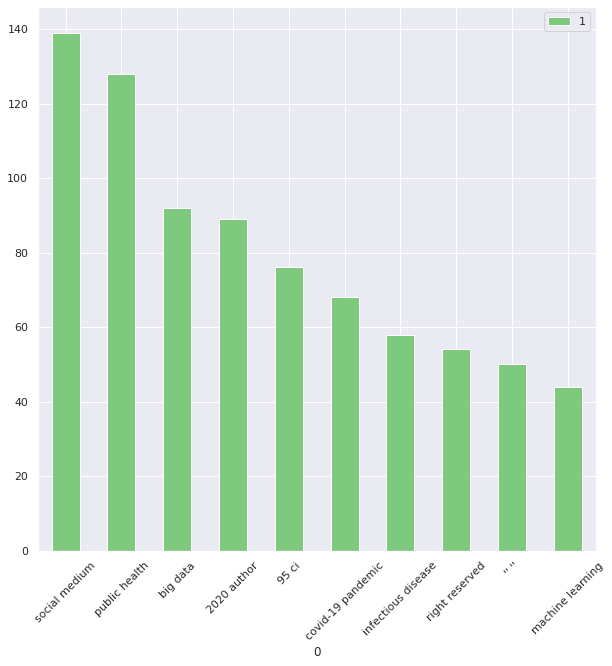

In [ ]:
#Creating a visualization for the digrams
common_digrams = pd.DataFrame(Counter(itertools.chain(*df1["ngram"])).most_common(10)).set_index(0)
common_digrams.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

The top digrams seem to be rather general, not focused around the current situation. They contain phrases such as "public health" and "social medium". Some combinations not connected to the particular topic also made it into the list, such as "right reserved".

In [ ]:
#Finding the 10 most common words
Counter(itertools.chain(*df1["tokenized"])).most_common(10)

[('data', 903),
 ('covid-19', 518),
 ('study', 496),
 ('model', 448),
 ('2020', 386),
 ('health', 385),
 ('disease', 354),
 ('research', 322),
 ('social', 306),
 ('result', 277)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

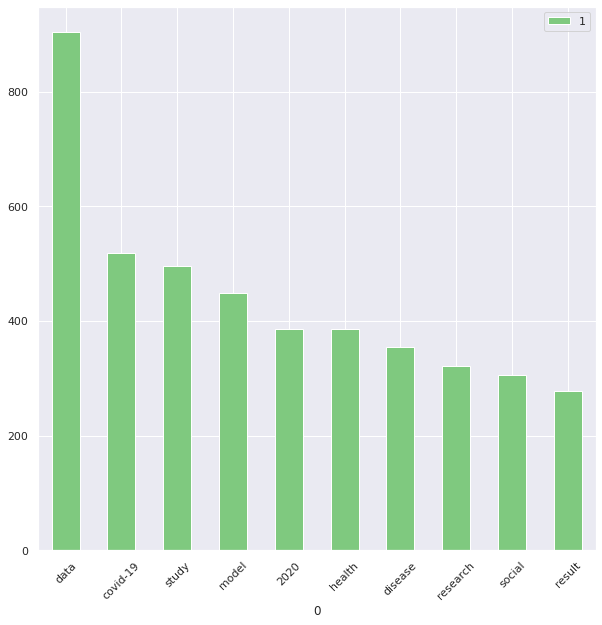

In [ ]:
#Visualizing the 10 most common words
common_tokenized = pd.DataFrame(Counter(itertools.chain(*df1["tokenized"])).most_common(10)).set_index(0)
common_tokenized.plot.bar(colormap = "Accent")
plt.xticks(rotation=45)

Those appear to be a bit less general and more focused on the current situation, with words such as "2020" and "covid-19" making it on the list.

In [ ]:
#Creating two dataframes -one for before and one for during 2020
df_pre = df[df["year"] != 2020]
df_post = df[df["year"] == 2020]
text_pre = df_pre["abstract"].to_string()
text_post = df_post["abstract"].to_string()

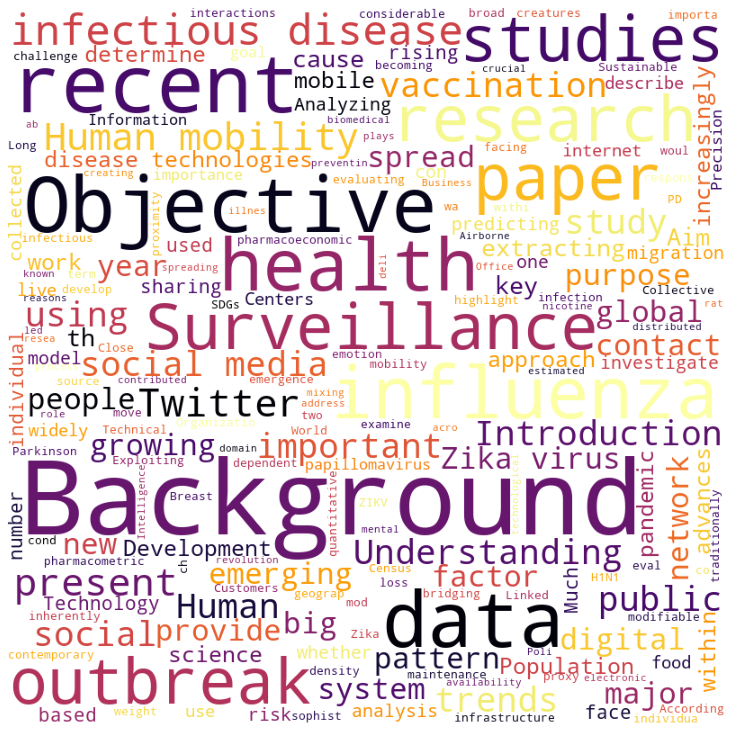

In [ ]:
#Creating a wordcloud for the abstract before 2020
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, colormap = "inferno").generate(text_pre)

plt.figure(facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

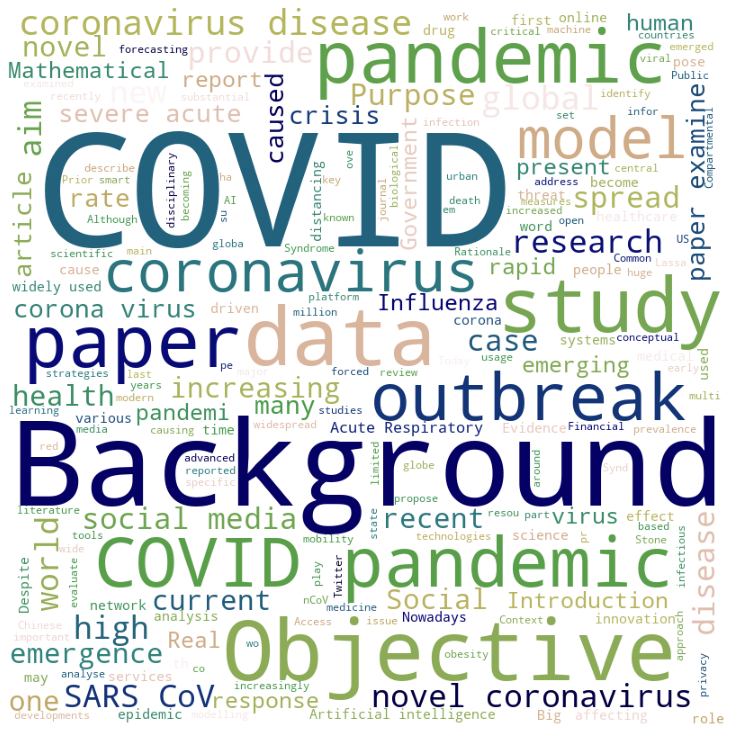

In [ ]:
#Creating a wordcloud for the abstract in 2020
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, colormap = "gist_earth").generate(text_post)

plt.figure(facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

It can be seen, that the wordcloud for the years before 2020 contains a lot more general terms, such as "studies" or survaillence". In the wordcloud for 2020 those words appear to be replaced by terms connected to the currently ongoing pandemic.

##UML

In [ ]:
#Creating a dictionary from the tokenized abstract
dictionary= Dictionary(df1['tokenized'])
#Creating a corpus from the dictionary
corpus = [dictionary.doc2bow(doc) for doc in df1['tokenized']]
#Fitting tfidf
tfidf = TfidfModel(corpus)
#Applying tfidf
corpus_tfidf = tfidf[corpus]

TF-IDF (term frequency–inverse document frequency) is a method for evaluating how important a given word is within the dataset. In short, a word is discounted if it appears very often, and it has a higher value if it appears less.

In [ ]:
#Calculating a coherence score for the different number of topics
#Creating an empty set for coherence
coherence = []
#Creating a range
I = range(1,21)
#Iterating over the range to check the coherence for each number of topics
for i in I:
    lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda, texts=df1['tokenized'].tolist(), dictionary=dictionary, coherence='c_v')
    coherence.append(coherence_model_lda.get_coherence())

Topic Coherence measures the score by measuring the degree of similarity between high scoring words in the topic.

Here we are looking for the highest coherence that still gives us a reasonable number of topics.

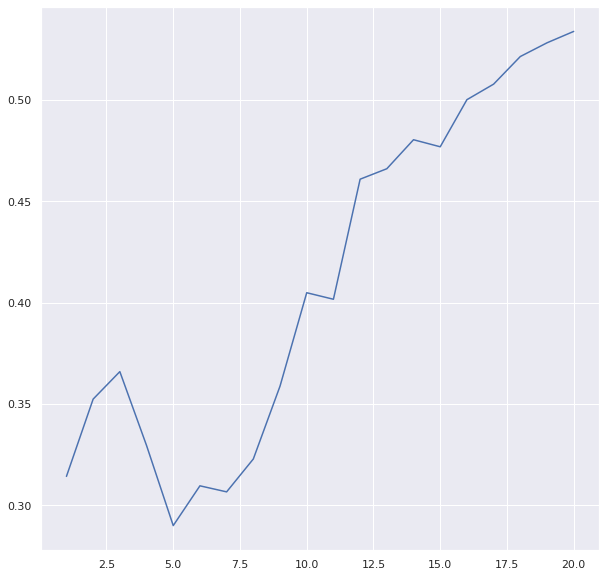

In [ ]:
#Visualizing the coherence plot
#12 is the number that gives a high coherence while not being overwhelmingly high
sns.lineplot(I, coherence)

In [ ]:
#Creating LDA model
lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=12)

LDA was chosen, as it is a dimensionality reduction approach that was specifically designed for topic modelling (as opposed to the methods mostly used for further machine learning pipeline.)

In [ ]:
#Printing the topics out
#They seem rather similar, it is difficult to understand the differences between them based on reading
lda.print_topics()

[(0,
  '0.001*"covid-19" + 0.001*"epidemic" + 0.001*"data" + 0.001*"rate" + 0.001*"model" + 0.001*"social" + 0.001*"policy" + 0.001*"big" + 0.001*"patient" + 0.001*"gambling"'),
 (1,
  '0.001*"\'\'" + 0.001*"digital" + 0.001*"cell" + 0.001*"ace2" + 0.001*"medium" + 0.001*"intelligent" + 0.001*"moocs" + 0.001*"public" + 0.001*"service" + 0.001*"tmprss2"'),
 (2,
  '0.001*"\'\'" + 0.001*"health" + 0.001*"network" + 0.001*"medium" + 0.001*"malware" + 0.001*"source" + 0.001*"error" + 0.001*"cgdi" + 0.001*"vaccination" + 0.001*"vaccine"'),
 (3,
  '0.001*"asymptomatic" + 0.001*"network" + 0.001*"collective" + 0.001*"social" + 0.001*"user" + 0.001*"decree" + 0.001*"model" + 0.001*"health" + 0.001*"patient" + 0.001*"data"'),
 (4,
  '0.001*"model" + 0.001*"mobility" + 0.001*"drug" + 0.001*"data" + 0.001*"covid-19" + 0.001*"country" + 0.001*"population" + 0.001*"ili" + 0.001*"bi" + 0.001*"time"'),
 (5,
  '0.001*"influenza" + 0.001*"ai" + 0.001*"system" + 0.001*"city" + 0.001*"av" + 0.001*"review"

In [ ]:
#Creating a visualization
#That allows to see the differences between the topics a lot clearer
#The plot is interactive - hover over the topics to see which words are the most prominent within it
#Hover over the word to see which topic it's mostly used in
display = pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary)
pyLDAvis.display(display)

There appear to be three main "clusters" in which the topics appear with particularly one topic clearly set aside. Many of the high ranking words within it seem to be more connected to the older research key words and less to the current situation.

In [ ]:
# defining a function that will add the dominant topic to each index value
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'perc_contribution', 'topic_keywords']
        # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
#Adding the dominant topics to the dataframe
df2 = format_topics_sentences(lda, corpus_tfidf, df1["tokenized"])
df2.head()

dominant_topic  ...                                          tokenized
0             2.0  ...  [coronavirus, disease, covid-19, caused, sars-...
1             7.0  ...  [covid-19, pandemic, forced, many, organisatio...
2             5.0  ...  [aim, according, world, health, organization, ...
3             9.0  ...  [novel, coronavirus, 2019-ncov, causing, outbr...
4             6.0  ...  [pandemic, corona, virus, called, covid-19, ou...

[5 rows x 4 columns]

In [ ]:
#Checking which topics are the most "popular"
df2["dominant_topic"].value_counts()

4.0     49
0.0     46
11.0    44
6.0     43
10.0    42
5.0     38
9.0     37
3.0     36
2.0     35
7.0     34
8.0     32
1.0     30
Name: dominant_topic, dtype: int64

In [ ]:
# creating a similarity matrix
similarity_matrix = MatrixSimilarity(corpus_tfidf)
similarity_matrix_index = similarity_matrix.index
# reducing the dimensionality for the visualization
visualization = umap.UMAP().fit_transform(similarity_matrix_index)

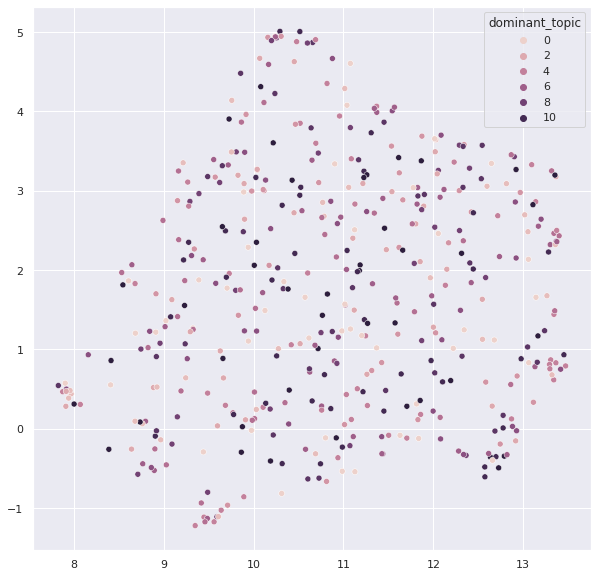

In [ ]:
#Using the scatterplot to inspect the distribution of different topics on the UMAP reduced similarity matrix for the corpus
sns.scatterplot(*visualization.T, hue=df2["dominant_topic"])

The distribution seems to be rather random, there is no clear pattern to be seen. Additionally, no clusters are created in the process of UMAP dimensionality reduction. That suggests, that all the abstracts are written in a rather uniform way. It should not come as a surprise considering the limitations of proper scientific language and the space limitation within abstract.